In [1]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Parameters
n_samples = 10000
n_variables_uniform = 50
n_runs = 1000

# Theoretical values
mean = 0.5
variance = 1 / (12 * n_variables_uniform)
std = np.sqrt(variance)

# Generate means of random variables
averages = [np.mean(np.random.uniform(0, 1, n_variables_uniform)) for _ in range(n_samples)]

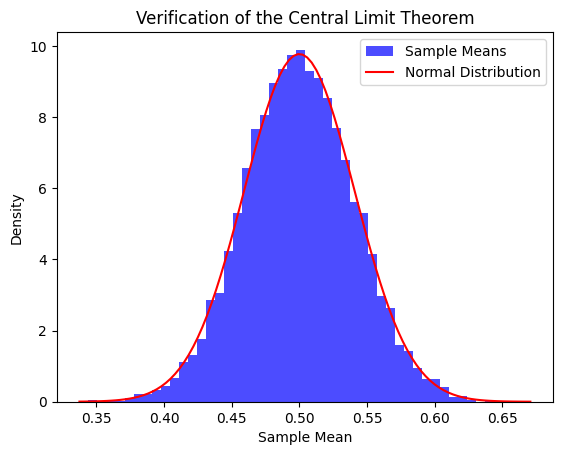

In [3]:
# Plot histogram
plt.hist(averages, bins=50, density=True, alpha=0.7, color='blue', label="Sample Means")
# Overlay normal distribution for comparison
sigma = np.sqrt(variance)
x = np.linspace(min(averages), max(averages), 100)
plt.plot(x, stats.norm.pdf(x, mean, sigma), 'r', label="Normal Distribution")
plt.title("Verification of the Central Limit Theorem")
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.legend()
plt.show()

In [4]:
# Empirical mean & variance error plots
mean_errors = np.zeros(n_samples)
variance_errors = np.zeros(n_samples)

for _ in range(n_runs):
    averages = [np.mean(np.random.uniform(0, 1, n_variables_uniform)) for _ in range(n_samples)]
    empirical_mean = np.cumsum(averages) / np.arange(1, n_samples + 1)
    empirical_variance = np.cumsum([(averages[i] - empirical_mean[i]) ** 2 for i in range(n_samples)]) / np.arange(1, n_samples + 1)
    
    mean_errors += np.abs(empirical_mean - mean)
    variance_errors += np.abs(empirical_variance - variance)

# Averaging errors over runs
mean_errors /= n_runs
variance_errors /= n_runs

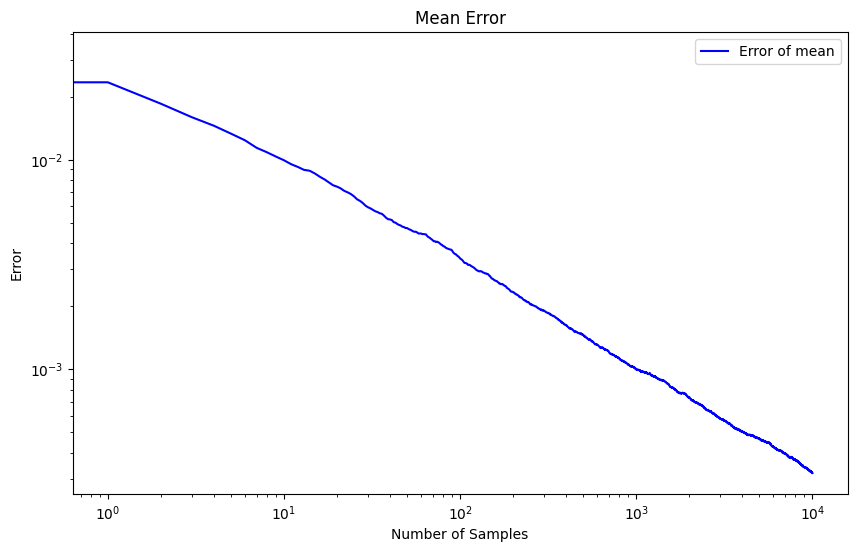

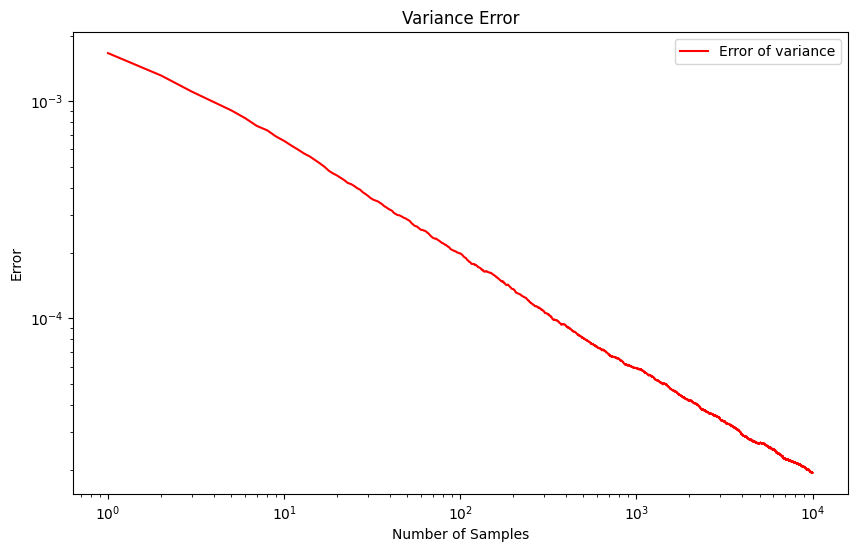

In [5]:
# Plot of the comparison of mean error
plt.figure(figsize=(10, 6))
plt.loglog(range(n_samples), mean_errors, 'b', label="Error of mean")
plt.title("Mean Error")
plt.xlabel("Number of Samples")
plt.ylabel("Error")
plt.legend()
plt.show()

# Plot of the comparison of variance error
plt.figure(figsize=(10, 6))
plt.loglog(range(1, n_samples + 1), variance_errors, 'r', label="Error of variance")
plt.title("Variance Error")
plt.xlabel("Number of Samples")
plt.ylabel("Error")
plt.legend()
plt.show()